In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
pd.set_option('display.max_columns', None)
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt


# Introduction

Our group has chosen to work on on exploring and predicting telecom churn data. Telecom churn refers to when a customer leaves the service. This is important to telecom companies, as more often that not, retaining existing customers is more cost-effective than acquiring new ones. 

# DATA LOADING

In [3]:
df = pd.read_csv('tele2.csv')

In [4]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
df.columns.values

array(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status',
       'Churn Category', 'Churn Reason'], dtype=object)

Data clean-up, removal of unnecessary columns

In [6]:
df1 = df[['Gender', 'Age', 'Married', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Phone Service','Multiple Lines',
       'Internet Service','Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Contract',
       'Paperless Billing', 'Payment Method','Customer Status']]
df1.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Customer Status
0,Female,37,Yes,0,2,9,Yes,No,Yes,No,Yes,No,Yes,Yes,No,One Year,Yes,Credit Card,Stayed
1,Male,46,No,0,0,9,Yes,Yes,Yes,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,Stayed
2,Male,50,No,0,0,4,Yes,No,Yes,No,No,Yes,No,No,No,Month-to-Month,Yes,Bank Withdrawal,Churned
3,Male,78,Yes,0,1,13,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned
4,Female,75,Yes,0,3,3,Yes,No,Yes,No,No,No,Yes,Yes,No,Month-to-Month,Yes,Credit Card,Churned


In [7]:
df1.dtypes

Gender                    object
Age                        int64
Married                   object
Number of Dependents       int64
Number of Referrals        int64
Tenure in Months           int64
Phone Service             object
Multiple Lines            object
Internet Service          object
Online Security           object
Online Backup             object
Device Protection Plan    object
Premium Tech Support      object
Streaming TV              object
Streaming Movies          object
Contract                  object
Paperless Billing         object
Payment Method            object
Customer Status           object
dtype: object

In [8]:
df1.isnull().sum()

Gender                       0
Age                          0
Married                      0
Number of Dependents         0
Number of Referrals          0
Tenure in Months             0
Phone Service                0
Multiple Lines             682
Internet Service             0
Online Security           1526
Online Backup             1526
Device Protection Plan    1526
Premium Tech Support      1526
Streaming TV              1526
Streaming Movies          1526
Contract                     0
Paperless Billing            0
Payment Method               0
Customer Status              0
dtype: int64

In [9]:
#Changing the predictor into a binary representation
df1['Customer Status'].replace(to_replace='Churned', value=1, inplace= False)
df1['Customer Status'].replace(to_replace='Stayed',  value=0, inplace = False)

0             0
1             0
2       Churned
3       Churned
4       Churned
         ...   
7038          0
7039    Churned
7040     Joined
7041          0
7042          0
Name: Customer Status, Length: 7043, dtype: object

In [10]:
df1_dummies = pd.get_dummies(df1)
df1_dummies.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Gender_Female,Gender_Male,Married_No,Married_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_Yes,Internet Service_No,Internet Service_Yes,Online Security_No,Online Security_Yes,Online Backup_No,Online Backup_Yes,Device Protection Plan_No,Device Protection Plan_Yes,Premium Tech Support_No,Premium Tech Support_Yes,Streaming TV_No,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Customer Status_Churned,Customer Status_Joined,Customer Status_Stayed
0,37,0,2,9,1,0,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,46,0,0,9,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1
2,50,0,0,4,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0
3,78,0,1,13,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0
4,75,0,3,3,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0


<AxesSubplot: >

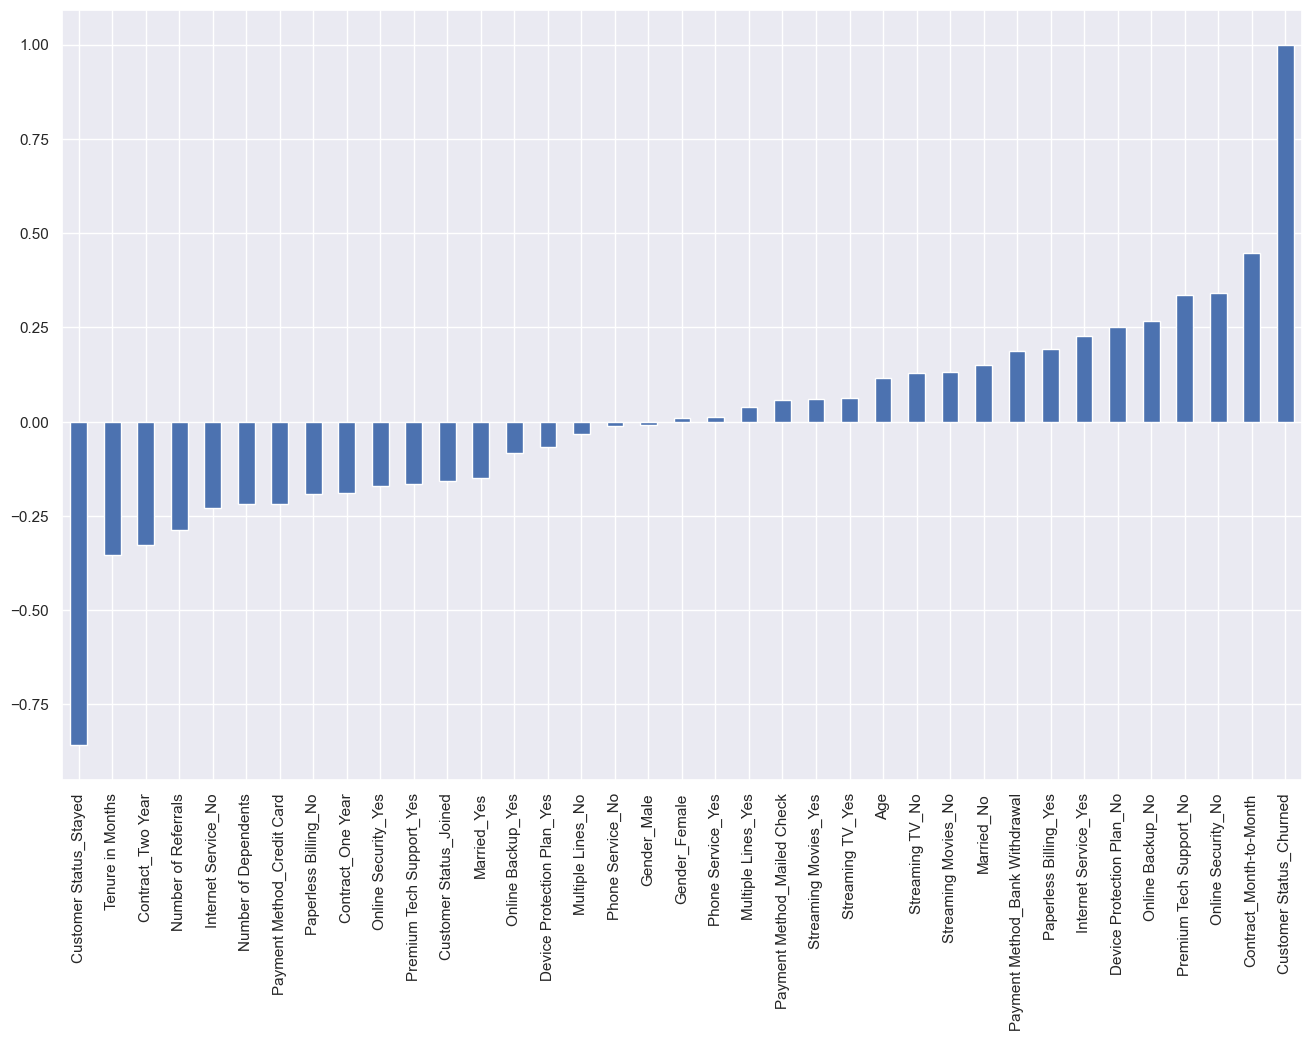

In [11]:
plt.figure(figsize=(16,10))
df1_dummies.corr()['Customer Status_Churned'].sort_values(ascending = True).plot(kind='bar')

From the graph, factors such as tenure in months and contracts of two years are negatively correlated with churn, while factors such as month-to-month contracts and the lack of online security are positively correlated with churn.

# Data Exploration

## Demographic

In [12]:
demo = df[['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents']]
demo.head()

,Customer ID,Gender,Age,Married,Number of Dependents
0,0002-ORFBO,Female,37,Yes,0
1,0003-MKNFE,Male,46,No,0
2,0004-TLHLJ,Male,50,No,0
3,0011-IGKFF,Male,78,Yes,0
4,0013-EXCHZ,Female,75,Yes,0


#### Gender

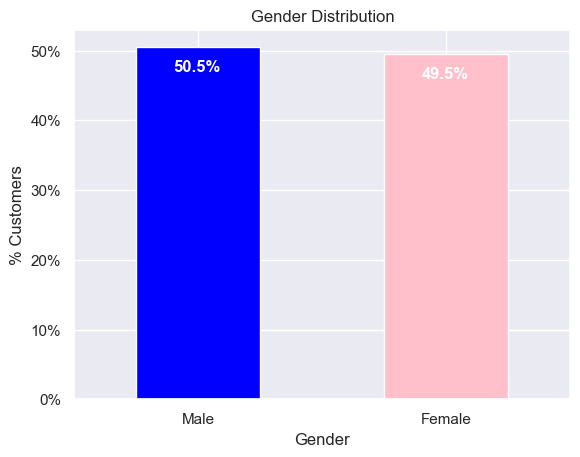

In [13]:
ax = (df['Gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0, color = ['#0000FF','#FFC0CB'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []

for i in ax.patches:
    totals.append(i.get_width())
    
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

50.5% of customers are male, the rest female. Slightly more male customers than female, considered negligible difference

#### Age

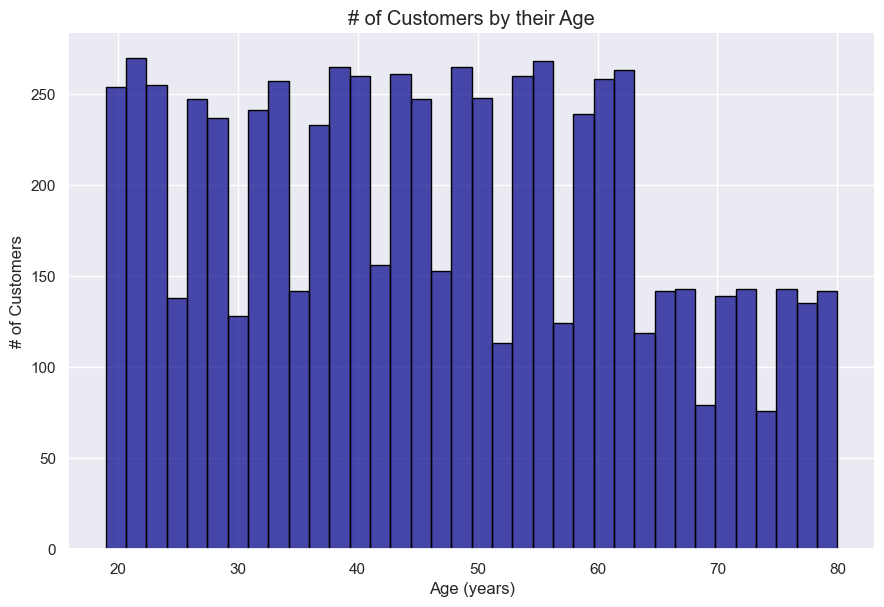

In [14]:
sb.displot(data=df1, x="Age", bins=int(180/5), color='darkblue',
            edgecolor='black', alpha=0.7, height=6, aspect=1.5)
sb.set_style('darkgrid')
sb.set(font_scale=1.2)
sb.despine(left=True)
plt.ylabel('# of Customers')
plt.xlabel('Age (years)')
plt.title('# of Customers by their Age')
plt.show()


The bulk of customers are less than 62 years of age

#### Marriage Status

Text(0.5, 1.0, '% of Married Customers')

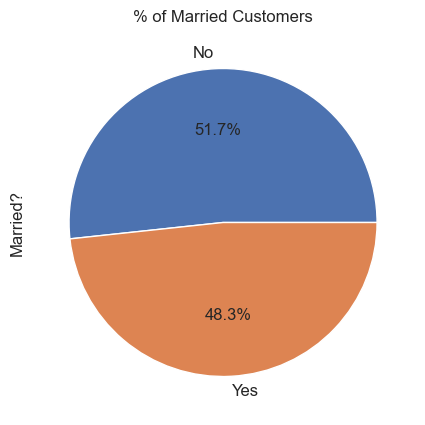

In [15]:
ax = (df1['Married'].value_counts()*100.0 /len(df1))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Married?',fontsize = 12)
ax.set_title('% of Married Customers', fontsize = 12)

51.7% of customers are married, the other 48.3% are single

#### Number of Dependents 

In [16]:
demo['Number of Dependents'].value_counts()

0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
9       1
8       1
Name: Number of Dependents, dtype: int64

From the data above, we can see that the data for number of dependents that are greater than 3 are very insignificant, and therefore we can regard them as outliers.

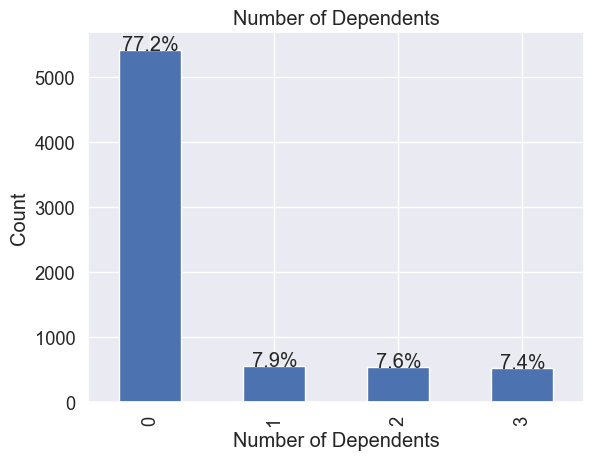

In [17]:
counts = demo[demo['Number of Dependents'] <= 3]['Number of Dependents'].value_counts().sort_index()
percentages = counts / counts.sum() * 100
ax = counts.plot.bar()
plt.title('Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
for i, v in enumerate(counts):
    ax.text(i, v + 1, f"{percentages[i]:.1f}%", ha='center')
plt.show()

Bulk of customers have 0 dependents

## Customer Account Infomation 

#### Tenure 

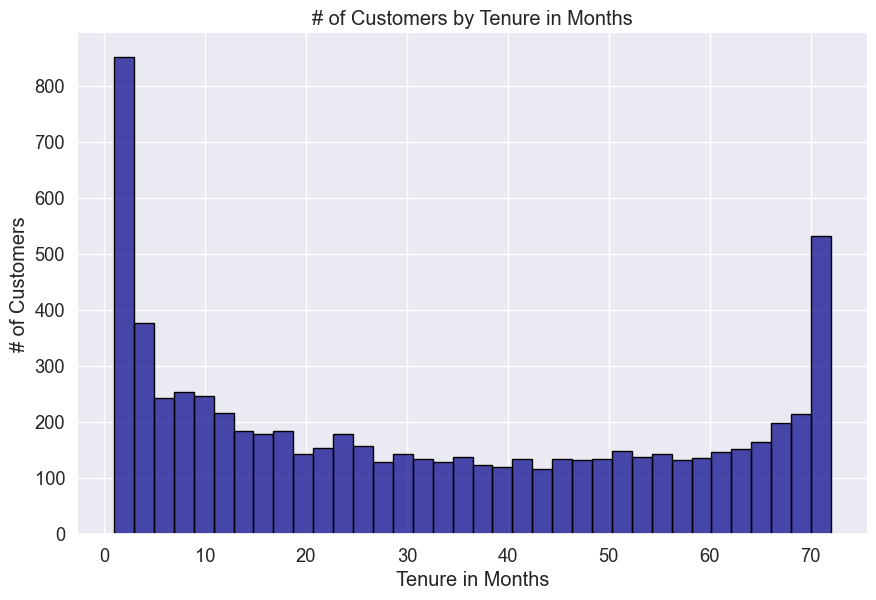

In [18]:
sb.displot(data=df1, x="Tenure in Months", bins=int(180/5), color='darkblue',
            edgecolor='black', alpha=0.7, height=6, aspect=1.5)
sb.set_style('darkgrid')
sb.set(font_scale=1.2)
sb.despine(left=True)
plt.ylabel('# of Customers')
plt.xlabel('Tenure in Months')
plt.title('# of Customers by Tenure in Months')
plt.show()

A great number of customer had only been with the telecom company for just a month. 
On the other hand, there's a significant portion of customers that had been with the company for 70 months 

#### Contracts  

Text(0.5, 1.0, '# of Customers by Contract Type')

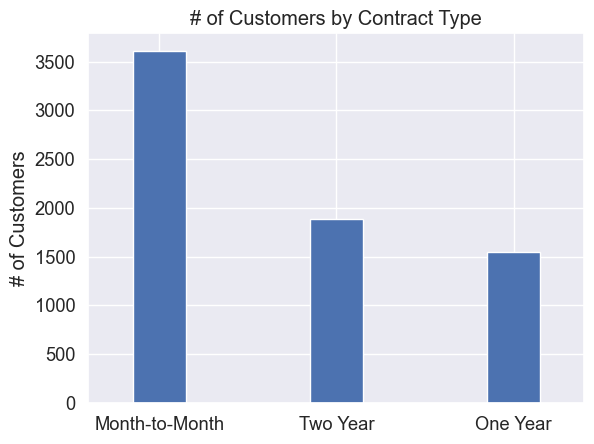

In [19]:
ax = df1['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Most customers are taking the month-to-month contract, while there is slightly more customers taking the two years contract compared to the one year contract.

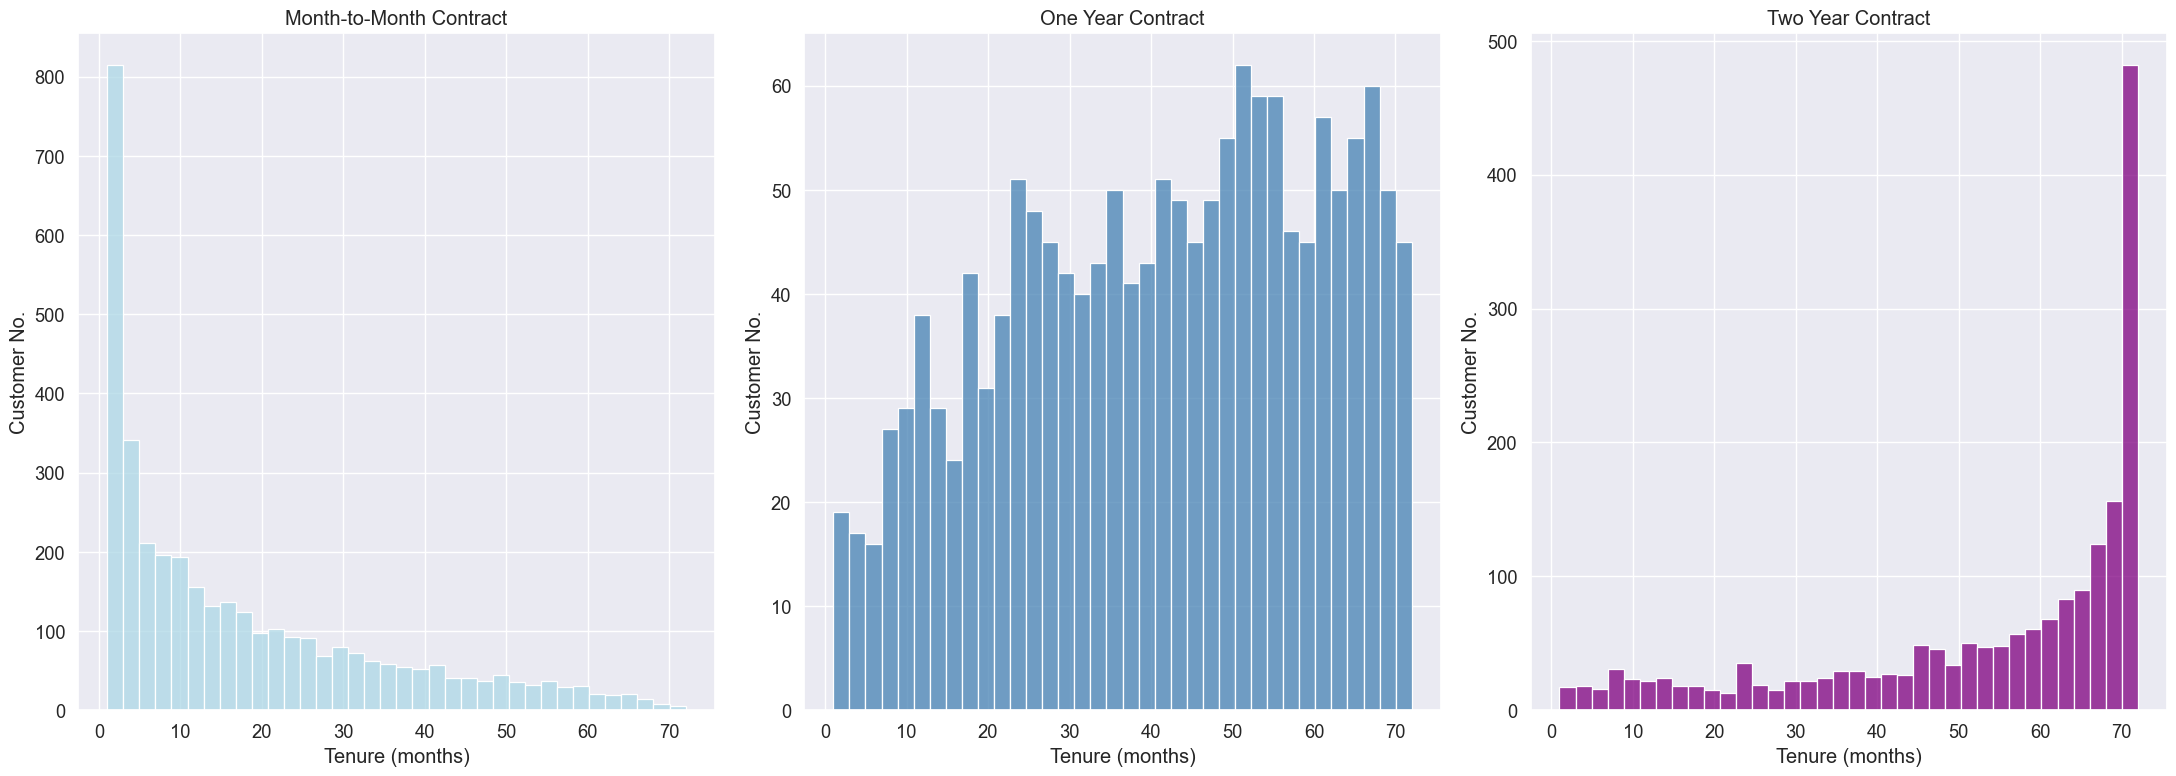

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(22, 8))

# Month-to-Month contracts
sb.histplot(df1[df1['Contract'] == 'Month-to-Month'], x='Tenure in Months',
            bins=int(180/5), color='lightblue', ax=ax1)
ax1.set_ylabel('Customer No.')
ax1.set_xlabel('Tenure (months)')
ax1.set_title('Month-to-Month Contract')

# One Year contracts
sb.histplot(df1[df1['Contract'] == 'One Year'], x='Tenure in Months',
            bins=int(180/5), color='steelblue', ax=ax2)
ax2.set_ylabel('Customer No.')
ax2.set_xlabel('Tenure (months)')
ax2.set_title('One Year Contract')

# Two Year contracts
sb.histplot(df1[df1['Contract'] == 'Two Year'], x='Tenure in Months',
            bins=int(180/5), color='purple', ax=ax3)
ax3.set_ylabel('Customer No.')
ax3.set_xlabel('Tenure (months)')
ax3.set_title('Two Year Contract')

plt.tight_layout()
plt.show()

From the first graph, majority of month-to-month contracts have tenure period of less than ten months, with most of them lasting for 2 months or less. 

From the second graph(One year contract), there doesnt seem to be a clear trend, perhaps just slightly more contracts lasting for 40 to 70 months compared to less than 30 months.

Interesting similar to the first graph, the third graph(Two year contracts) has majority of contracts lasting for 70 months, which showed that longer contracts is linked to customers staying with the company for a longer period of time. 

This analysis aligns with what we observed earlier for the correlation chart, where tenure is one of the most significant factor on the churn rate

### Predictor (Churn) 

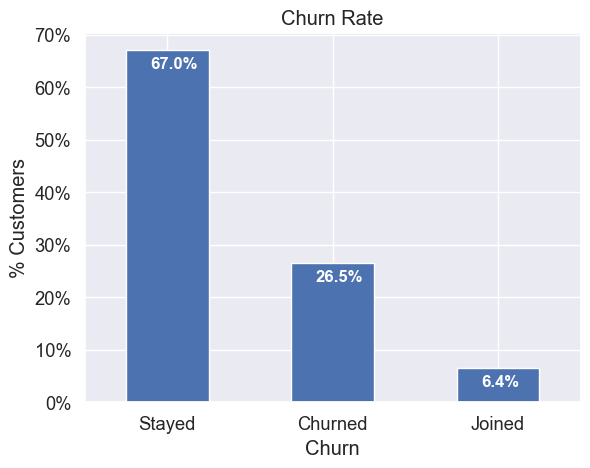

In [32]:
ax = (df1['Customer Status'].value_counts() / len(df1) * 100).plot(kind='bar', stacked=True, rot=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')

totals = []


for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()), 1))+'%',
            fontsize=12,
            color='white',
            weight='bold')

Majority of customers ( 67.0% ) stayed with the telecom company. Next, we will be observing the churn rate by contract type and tenure periods below.

<AxesSubplot: xlabel='Customer Status', ylabel='Tenure in Months'>

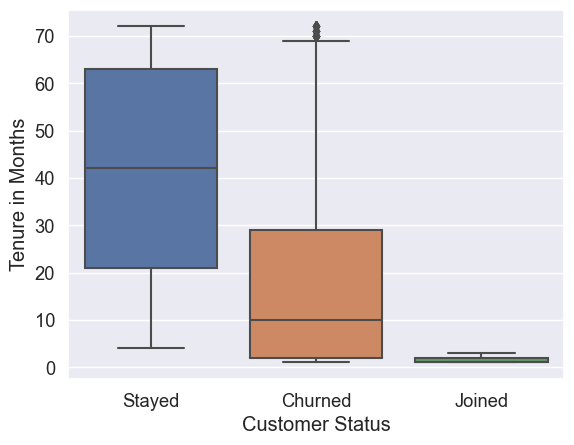

In [35]:
sb.boxplot(x = df1['Customer Status'], y = df1['Tenure in Months'])

From the above boxplot, we can clearly see that customers that stayed longer are less likely to churn

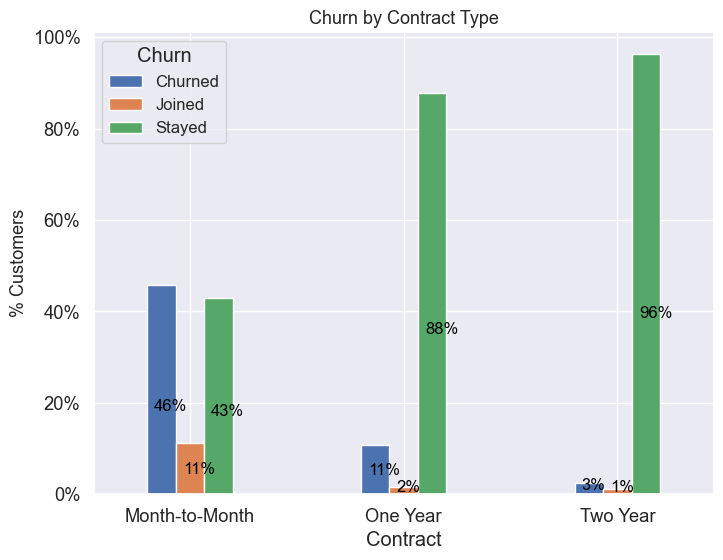

In [22]:
contract_churn = df.groupby(['Contract','Customer Status']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.4,
                                                                stacked = False,
                                                                rot = 0, 
                                                                figsize = (8,6))
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':12},title = 'Churn')
ax.set_ylabel('% Customers',size = 13)
ax.set_title('Churn by Contract Type',size = 13)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black',
               size = 12)

Here, we can observe that a significant portion of customeres taking monthly contracts are likely to churn, while customers taking long term contracts are muuch less likely to churn. 



# Machine Learning

#### Logistic Regression Model

In [42]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


In [43]:
y = df1_dummies['Customer Status_Churned'].values
X = df1_dummies.drop(columns = ['Customer Status_Churned','Customer Status_Stayed', 'Customer Status_Joined'])

# Scaling variables to a range of 0 to 1

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=101)

model = LogisticRegression()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)

print (metrics.accuracy_score(y_test, prediction_test))

0.837473385379702


In [45]:
#checking prediction accuracy
confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
print(confusion_matrix)
accuracy_score = (confusion_matrix[0,0] + confusion_matrix[1,1]) / confusion_matrix.sum()
print(accuracy_score)

[[938  92]
 [137 242]]
0.837473385379702


AxesSubplot(0.125,0.11;0.775x0.77)


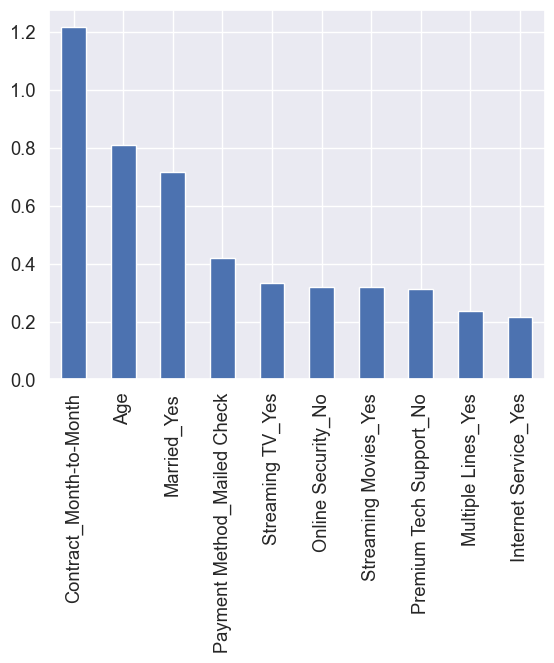

In [46]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.11;0.775x0.77)


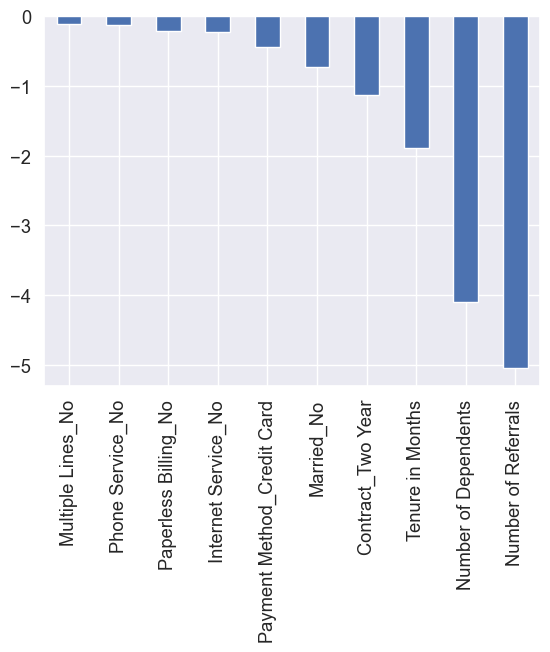

In [47]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

From the two graphs, we can clearly see which variables have the largest impact on the churn rate. The variables with a negative relation means that the probability of churn decreases with it, while the variables with a positive relation means that the probability of churn increases with it.

#### Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

/Users/yh/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8282469836763662


We can see that both random forest(0.82824) and the logistic regression(0.83747) have a similar accuracy, with logistic regression being slightly higher.

<AxesSubplot: >

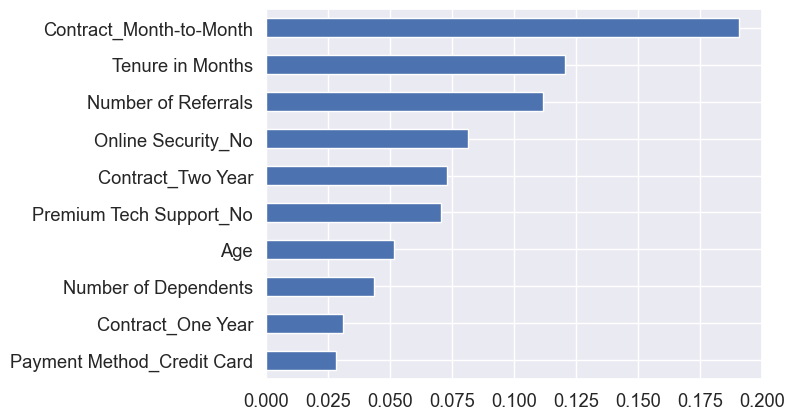

In [32]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

From the random forest model, we can see that the variables contract month-to-month, tenure in months, and number of referrals are the most significant variables that are used to predict churn. This aligns with the previous logistic regression model and also with our previous observation.

## Conclusion

There are many factors that can affect the churn rate of customers. Our group has narrowed down these factors to the most significant factors, namely the month-to-month contracts, tenure in  months and number of referrals. These factors can be something for telecom companies to work on in order to decrease their customers' churn rate.
From, we have come up some solutions which help telecom companies tackle a high churn rate.

We believe telecom companies should launch attractive benefits for long term contracts, which can attract more customers to switch from monthly to yearly contracts and therefore reduce their likelihood of churning.

Telecom companies can also build up customer loyalty through relevant experiences and specialized services, or by offering perks and rewards for long term customers to entice them into staying with them.

Finally,telecom companies can also provide various benefits for customers that are willing to make referrals. The act of referring can strengthen a customer’s loyalty to the company, and the benefits given to them will incentivise them to make more referrals.
